# Explore FTW dataset

In [1]:
import rasterio
import matplotlib.pyplot as plt
import pathlib as Path
import random
from scipy.ndimage import label
from skimage.color import label2rgb
import numpy as np

## Paths required to visualize the dataset

In [2]:
root_folder = "../data/ftw"
countries = [ "belgium", "cambodia", "croatia", "estonia", "portugal", "slovakia", "south_africa", "sweden", "austria", "brazil", "corsica", "denmark", "france", "india", "latvia", "luxembourg", "finland", "germany", "kenya", "lithuania", "netherlands", "rwanda", "slovenia", "spain", "vietnam" ]
samples_to_show = 1

## Function to plot the temporal images, and masks

In [3]:
import numpy as np

def print_information(wina, winb, sem2, sem3, inst):
    # Function to print detailed information about the images and masks

    def print_stats(data, name):
        """Print statistics like shape, dtype, range, mean, etc."""
        print(f"{name} Shape: ", data.shape)
        print(f"{name} Dtype: ", data.dtype)
        print(f"{name} Value Range: ", np.min(data), np.max(data))
        print(f"{name} Mean: ", np.mean(data))
        print(f"{name} Standard Deviation: ", np.std(data))
        print(f"{name} Unique Values: ", np.unique(data))
        print(f"{name} NaN or Invalid Values Present: ", np.isnan(data).any())

    # Window A
    print_stats(wina, "Window A")
    # Window B
    print_stats(winb, "Window B")
    
    # Semantic 2-class
    print_stats(sem2, "Semantic 2-class")
    
    # Semantic 3-class
    print_stats(sem3, "Semantic 3-class")
    
    # Instance Class
    print_stats(inst, "Instance Class")
    


def plot_data(window_a_file, window_b_file, semantic_2_class_file, semantic_3_class_file, instance_class_file):
    # Load window A and window B
    with rasterio.open(window_a_file) as src:
        window_a = src.read()[0:3, :, :]  # Reading first 3 bands
        window_a = window_a.transpose(1, 2, 0) / 3000  # Normalizing
    
    with rasterio.open(window_b_file) as src:
        window_b = src.read()[0:3, :, :]  # Reading first 3 bands
        window_b = window_b.transpose(1, 2, 0) / 3000  # Normalizing

    # Load semantic and instance data
    with rasterio.open(semantic_2_class_file) as src:
        semantic_2_class = src.read()

    with rasterio.open(semantic_3_class_file) as src:
        semantic_3_class = src.read()

    with rasterio.open(instance_class_file) as src:
        instance_class = src.read()[0]  # Assuming it's single band data for instance labels

        # Generate random colors for each instance class
        unique_labels = np.unique(instance_class)
        colors = [(np.random.rand(), np.random.rand(), np.random.rand()) for _ in unique_labels]
        instance_mask_rgb = label2rgb(instance_class, bg_label=0, bg_color=(0, 0, 0), colors=colors)

    # Print detailed information about the images and masks
    print_information(window_a, window_b, semantic_2_class, semantic_3_class, instance_class)

    # Create subplots to visualize the data
    fig, axs = plt.subplots(1, 5, figsize=(20, 10))
    
    # Display Window A
    axs[0].imshow(np.clip(window_a, 0, 1))  # Clipping to avoid over-scaling issues
    axs[0].set_title('Window A')
    
    # Display Window B
    axs[1].imshow(np.clip(window_b, 0, 1))  # Clipping to avoid over-scaling issues
    axs[1].set_title('Window B')
    
    # Display Semantic 2-class
    axs[2].imshow(semantic_2_class[0], cmap='viridis', vmin=0, vmax=2)
    axs[2].set_title('Semantic 2-class')
    
    # Display Semantic 3-class
    axs[3].imshow(semantic_3_class[0], cmap='viridis', vmin=0, vmax=2)
    axs[3].set_title('Semantic 3-class')
    
    # Display Instance class with RGB mask
    axs[4].imshow(instance_mask_rgb)
    axs[4].set_title('Instance class')

    for ax in axs:
        ax.axis('off')

    # Display the plot
    plt.show()

## Process all the countries mentioned

Processing belgium
Processing ../data/ftw/belgium/label_masks/semantic_2class/g6_00035_4.tif, ../data/ftw/belgium/label_masks/semantic_3class/g6_00035_4.tif, ../data/ftw/belgium/label_masks/instance/g6_00035_4.tif, ../data/ftw/belgium/s2_images/window_a/g6_00035_4.tif, ../data/ftw/belgium/s2_images/window_b/g6_00035_4.tif
Window A Shape:  (256, 256, 3)
Window A Dtype:  float64
Window A Value Range:  0.029333333333333333 4.8806666666666665
Window A Mean:  0.24295636494954428
Window A Standard Deviation:  0.15434470829908511
Window A Unique Values:  [0.02933333 0.04833333 0.04866667 ... 4.55866667 4.729      4.88066667]
Window A NaN or Invalid Values Present:  False
Window B Shape:  (256, 256, 3)
Window B Dtype:  float64
Window B Value Range:  0.07666666666666666 2.924
Window B Mean:  0.2811064792209201
Window B Standard Deviation:  0.15132236984736533
Window B Unique Values:  [0.07666667 0.08033333 0.08133333 ... 2.86433333 2.92033333 2.924     ]
Window B NaN or Invalid Values Present: 

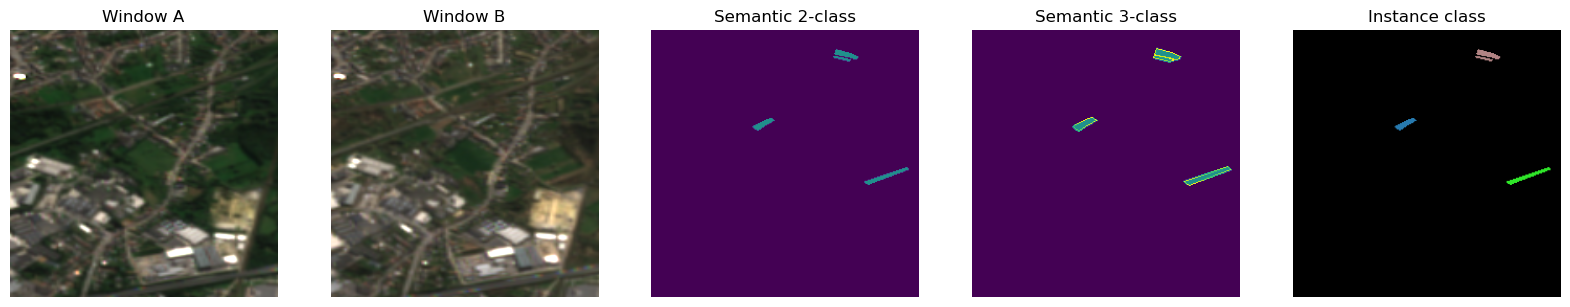

Processing cambodia
Processing ../data/ftw/cambodia/label_masks/semantic_2class/g60_0000001536-0000001024.tif, ../data/ftw/cambodia/label_masks/semantic_3class/g60_0000001536-0000001024.tif, ../data/ftw/cambodia/label_masks/instance/g60_0000001536-0000001024.tif, ../data/ftw/cambodia/s2_images/window_a/g60_0000001536-0000001024.tif, ../data/ftw/cambodia/s2_images/window_b/g60_0000001536-0000001024.tif
Window A Shape:  (256, 256, 3)
Window A Dtype:  float64
Window A Value Range:  0.04066666666666666 0.7716666666666666
Window A Mean:  0.196712890625
Window A Standard Deviation:  0.07411607805765648
Window A Unique Values:  [0.04066667 0.04133333 0.04166667 ... 0.75166667 0.75666667 0.77166667]
Window A NaN or Invalid Values Present:  False
Window B Shape:  (256, 256, 3)
Window B Dtype:  float64
Window B Value Range:  0.124 0.894
Window B Mean:  0.3102362484402127
Window B Standard Deviation:  0.09973811420331585
Window B Unique Values:  [0.124      0.125      0.12533333 ... 0.865      0.

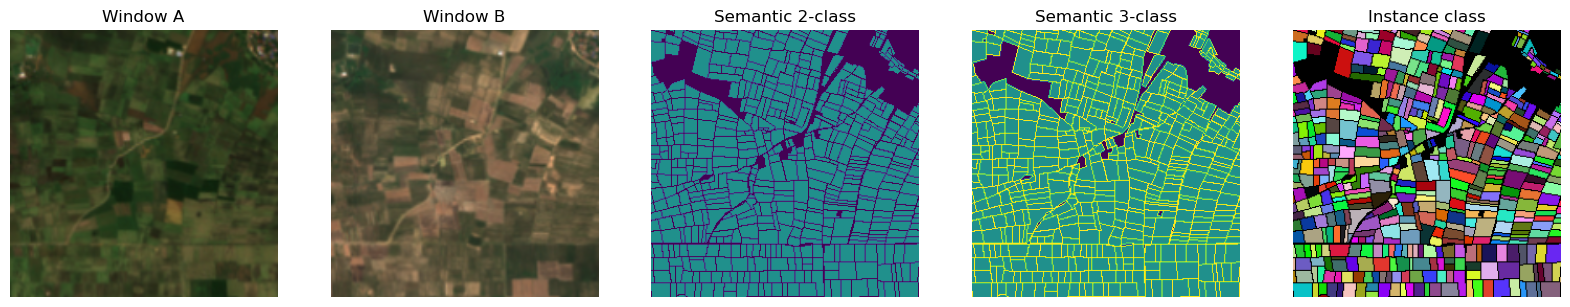

Processing croatia
Processing ../data/ftw/croatia/label_masks/semantic_2class/g10-3_00060_6.tif, ../data/ftw/croatia/label_masks/semantic_3class/g10-3_00060_6.tif, ../data/ftw/croatia/label_masks/instance/g10-3_00060_6.tif, ../data/ftw/croatia/s2_images/window_a/g10-3_00060_6.tif, ../data/ftw/croatia/s2_images/window_b/g10-3_00060_6.tif
Window A Shape:  (256, 256, 3)
Window A Dtype:  float64
Window A Value Range:  0.383 0.9656666666666667
Window A Mean:  0.5198475460476346
Window A Standard Deviation:  0.06965180910814696
Window A Unique Values:  [0.383      0.38366667 0.384      ... 0.952      0.95433333 0.96566667]
Window A NaN or Invalid Values Present:  False
Window B Shape:  (256, 256, 3)
Window B Dtype:  float64
Window B Value Range:  0.4493333333333333 0.9956666666666667
Window B Mean:  0.614123289320204
Window B Standard Deviation:  0.08286332057353811
Window B Unique Values:  [0.44933333 0.44966667 0.45033333 ... 0.98       0.98166667 0.99566667]
Window B NaN or Invalid Values

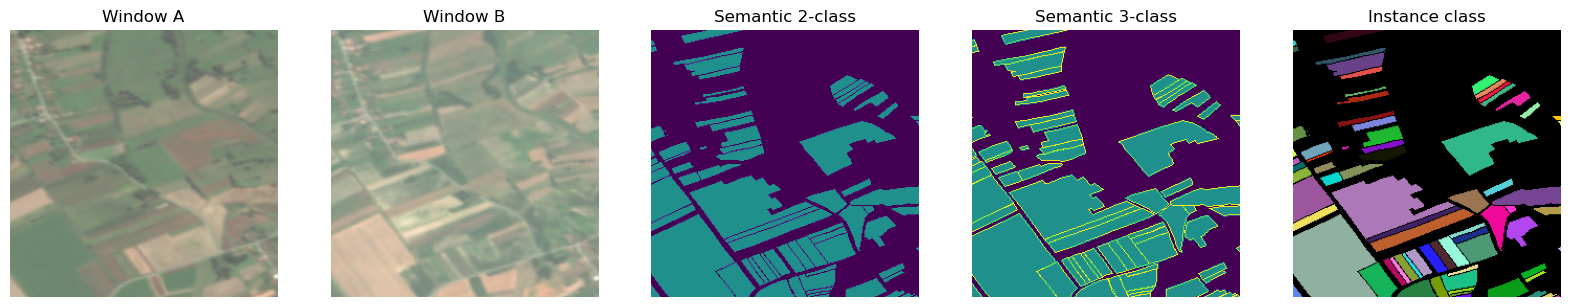

Processing estonia
Processing ../data/ftw/estonia/label_masks/semantic_2class/g15_00072_2.tif, ../data/ftw/estonia/label_masks/semantic_3class/g15_00072_2.tif, ../data/ftw/estonia/label_masks/instance/g15_00072_2.tif, ../data/ftw/estonia/s2_images/window_a/g15_00072_2.tif, ../data/ftw/estonia/s2_images/window_b/g15_00072_2.tif
Window A Shape:  (256, 256, 3)
Window A Dtype:  float64
Window A Value Range:  0.023 1.5326666666666666
Window A Mean:  0.21076755099826386
Window A Standard Deviation:  0.164281927289677
Window A Unique Values:  [0.023      0.025      0.026      ... 1.51966667 1.527      1.53266667]
Window A NaN or Invalid Values Present:  False
Window B Shape:  (256, 256, 3)
Window B Dtype:  float64
Window B Value Range:  0.028333333333333332 1.6286666666666667
Window B Mean:  0.12322117445203994
Window B Standard Deviation:  0.0929533153436273
Window B Unique Values:  [0.02833333 0.02866667 0.029      ... 1.60833333 1.61533333 1.62866667]
Window B NaN or Invalid Values Present

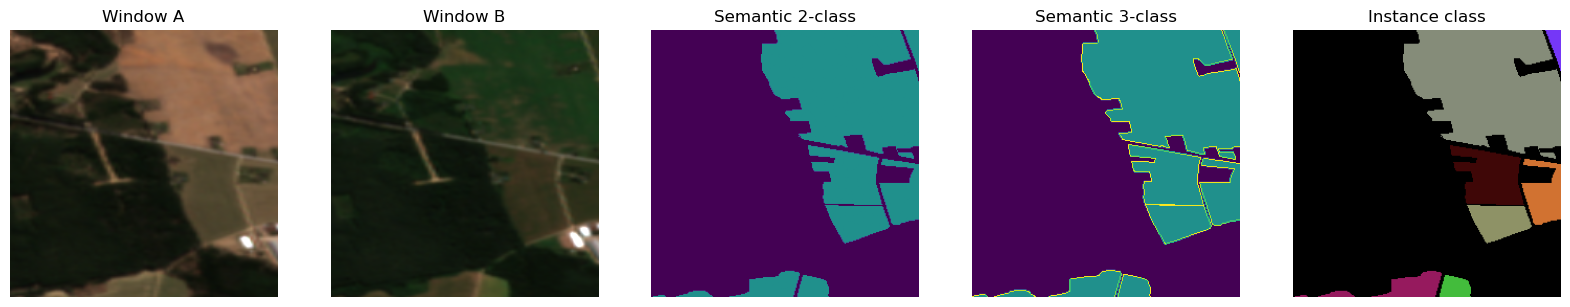

Processing portugal
Processing ../data/ftw/portugal/label_masks/semantic_2class/g22_0000000512-0000001024.tif, ../data/ftw/portugal/label_masks/semantic_3class/g22_0000000512-0000001024.tif, ../data/ftw/portugal/label_masks/instance/g22_0000000512-0000001024.tif, ../data/ftw/portugal/s2_images/window_a/g22_0000000512-0000001024.tif, ../data/ftw/portugal/s2_images/window_b/g22_0000000512-0000001024.tif
Window A Shape:  (256, 256, 3)
Window A Dtype:  float64
Window A Value Range:  0.018666666666666668 2.808666666666667
Window A Mean:  0.3157541385226779
Window A Standard Deviation:  0.2650044069492261
Window A Unique Values:  [0.01866667 0.019      0.01933333 ... 2.784      2.79866667 2.80866667]
Window A NaN or Invalid Values Present:  False
Window B Shape:  (256, 256, 3)
Window B Dtype:  float64
Window B Value Range:  0.0 1.5713333333333332
Window B Mean:  0.18398236762152784
Window B Standard Deviation:  0.13714694353444162
Window B Unique Values:  [0.00000000e+00 3.33333333e-04 6.666

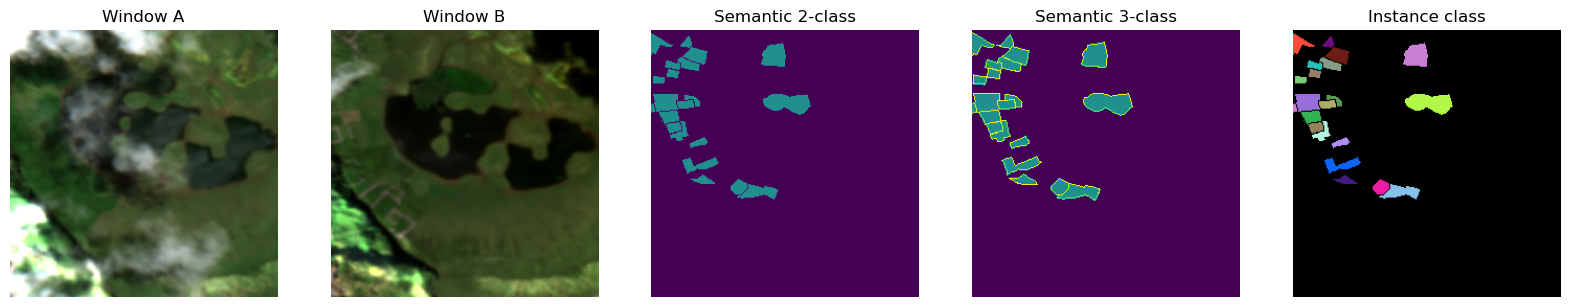

Processing slovakia
Processing ../data/ftw/slovakia/label_masks/semantic_2class/g21_00010_16.tif, ../data/ftw/slovakia/label_masks/semantic_3class/g21_00010_16.tif, ../data/ftw/slovakia/label_masks/instance/g21_00010_16.tif, ../data/ftw/slovakia/s2_images/window_a/g21_00010_16.tif, ../data/ftw/slovakia/s2_images/window_b/g21_00010_16.tif
Window A Shape:  (256, 256, 3)
Window A Dtype:  float64
Window A Value Range:  0.051666666666666666 0.782
Window A Mean:  0.1569439002143012
Window A Standard Deviation:  0.0715885019589659
Window A Unique Values:  [0.05166667 0.052      0.05333333 ... 0.73533333 0.746      0.782     ]
Window A NaN or Invalid Values Present:  False
Window B Shape:  (256, 256, 3)
Window B Dtype:  float64
Window B Value Range:  0.0003333333333333333 0.37333333333333335
Window B Mean:  0.10780691019694011
Window B Standard Deviation:  0.05238166705864374
Window B Unique Values:  [3.33333333e-04 6.66666667e-04 1.00000000e-03 1.33333333e-03
 1.66666667e-03 2.00000000e-03 2.

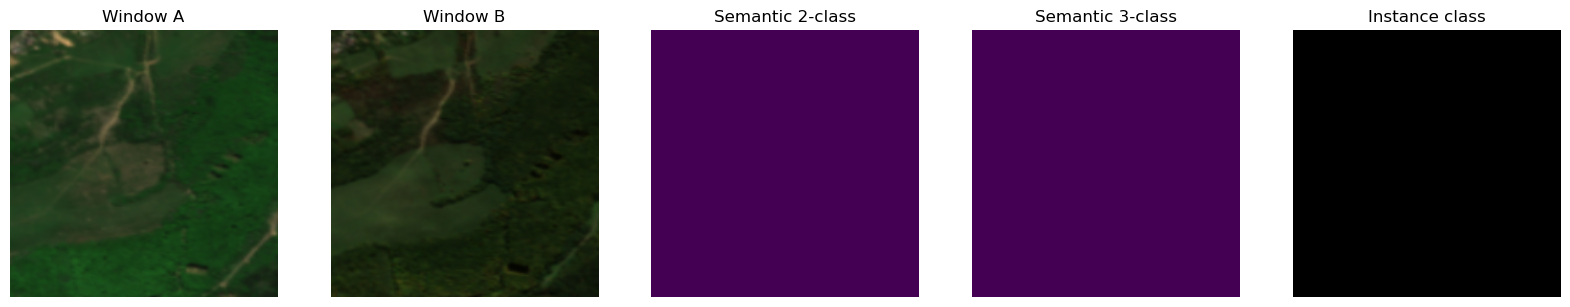

Processing south_africa
Processing ../data/ftw/south_africa/label_masks/semantic_2class/g2_00013_16.tif, ../data/ftw/south_africa/label_masks/semantic_3class/g2_00013_16.tif, ../data/ftw/south_africa/label_masks/instance/g2_00013_16.tif, ../data/ftw/south_africa/s2_images/window_a/g2_00013_16.tif, ../data/ftw/south_africa/s2_images/window_b/g2_00013_16.tif
Window A Shape:  (256, 256, 3)
Window A Dtype:  float64
Window A Value Range:  0.042 0.7693333333333333
Window A Mean:  0.23846004570855037
Window A Standard Deviation:  0.09226922242757356
Window A Unique Values:  [0.042      0.043      0.04333333 ... 0.74933333 0.76733333 0.76933333]
Window A NaN or Invalid Values Present:  False
Window B Shape:  (256, 256, 3)
Window B Dtype:  float64
Window B Value Range:  0.03133333333333333 0.823
Window B Mean:  0.2899071146647136
Window B Standard Deviation:  0.11891797831780089
Window B Unique Values:  [0.03133333 0.03733333 0.038      ... 0.808      0.815      0.823     ]
Window B NaN or Inva

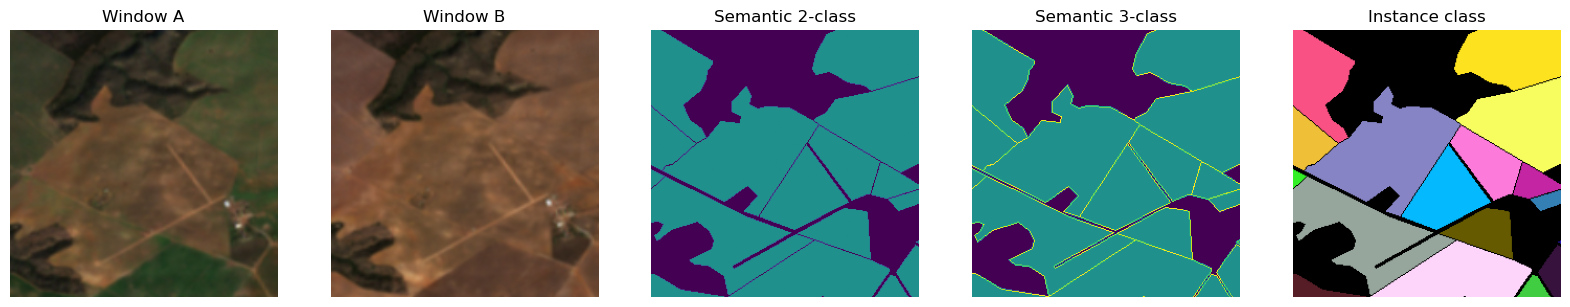

Processing sweden
Processing ../data/ftw/sweden/label_masks/semantic_2class/g6-0_00083_2.tif, ../data/ftw/sweden/label_masks/semantic_3class/g6-0_00083_2.tif, ../data/ftw/sweden/label_masks/instance/g6-0_00083_2.tif, ../data/ftw/sweden/s2_images/window_a/g6-0_00083_2.tif, ../data/ftw/sweden/s2_images/window_b/g6-0_00083_2.tif
Window A Shape:  (256, 256, 3)
Window A Dtype:  float64
Window A Value Range:  0.019666666666666666 0.8886666666666667
Window A Mean:  0.1374253184000651
Window A Standard Deviation:  0.09057088359886879
Window A Unique Values:  [0.01966667 0.021      0.02266667 ... 0.87833333 0.88066667 0.88866667]
Window A NaN or Invalid Values Present:  False
Window B Shape:  (256, 256, 3)
Window B Dtype:  float64
Window B Value Range:  0.024 0.6873333333333334
Window B Mean:  0.15878905232747398
Window B Standard Deviation:  0.11813215313340818
Window B Unique Values:  [0.024      0.02433333 0.02466667 ... 0.67366667 0.68166667 0.68733333]
Window B NaN or Invalid Values Presen

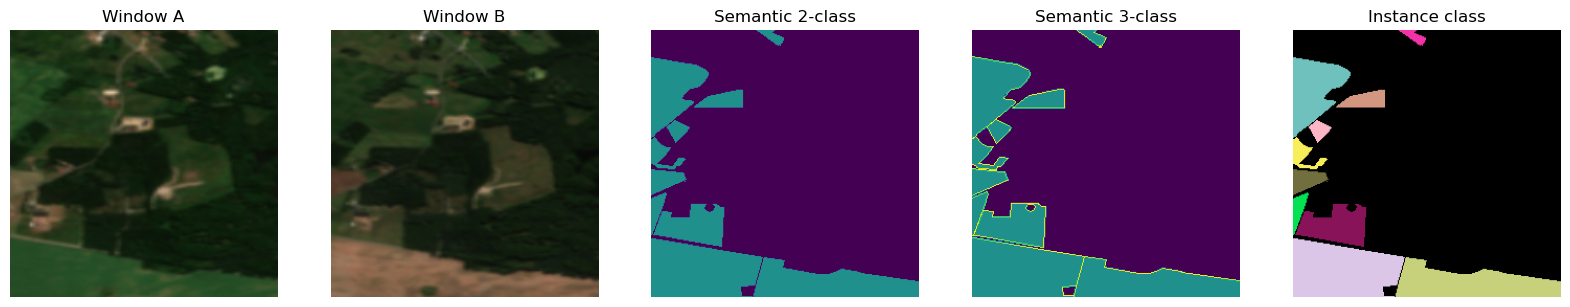

Processing austria
Processing ../data/ftw/austria/label_masks/semantic_2class/g77_00052_11.tif, ../data/ftw/austria/label_masks/semantic_3class/g77_00052_11.tif, ../data/ftw/austria/label_masks/instance/g77_00052_11.tif, ../data/ftw/austria/s2_images/window_a/g77_00052_11.tif, ../data/ftw/austria/s2_images/window_b/g77_00052_11.tif
Window A Shape:  (256, 256, 3)
Window A Dtype:  float64
Window A Value Range:  0.048666666666666664 0.9753333333333334
Window A Mean:  0.331313242594401
Window A Standard Deviation:  0.18977113060117198
Window A Unique Values:  [0.04866667 0.049      0.04933333 ... 0.965      0.96866667 0.97533333]
Window A NaN or Invalid Values Present:  False
Window B Shape:  (256, 256, 3)
Window B Dtype:  float64
Window B Value Range:  0.018666666666666668 0.8203333333333334
Window B Mean:  0.2180214046902127
Window B Standard Deviation:  0.12819626090078698
Window B Unique Values:  [0.01866667 0.02066667 0.02166667 ... 0.80233333 0.806      0.82033333]
Window B NaN or In

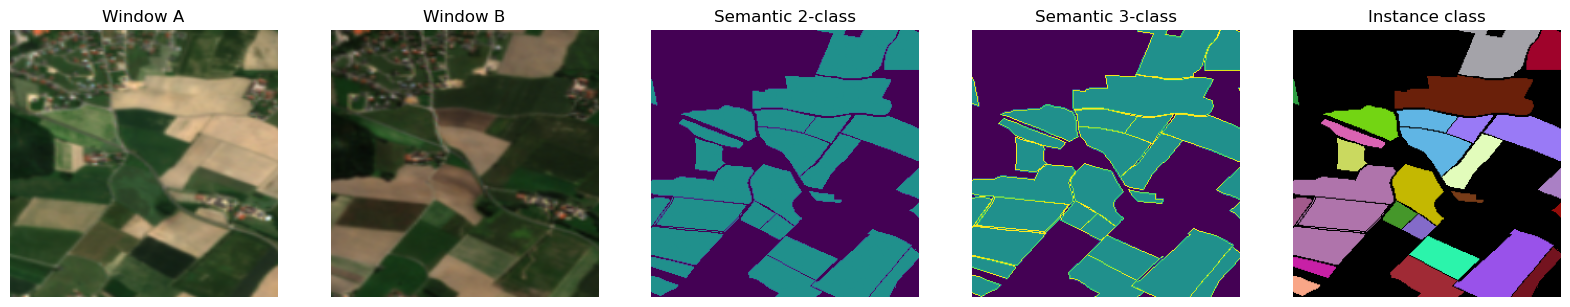

Processing brazil
Processing ../data/ftw/brazil/label_masks/semantic_2class/g4_0000012800-0000002048.tif, ../data/ftw/brazil/label_masks/semantic_3class/g4_0000012800-0000002048.tif, ../data/ftw/brazil/label_masks/instance/g4_0000012800-0000002048.tif, ../data/ftw/brazil/s2_images/window_a/g4_0000012800-0000002048.tif, ../data/ftw/brazil/s2_images/window_b/g4_0000012800-0000002048.tif
Window A Shape:  (256, 256, 3)
Window A Dtype:  float64
Window A Value Range:  0.3273333333333333 1.214
Window A Mean:  0.7246603478325738
Window A Standard Deviation:  0.23481454132717652
Window A Unique Values:  [0.32733333 0.32833333 0.32866667 ... 1.21266667 1.213      1.214     ]
Window A NaN or Invalid Values Present:  False
Window B Shape:  (256, 256, 3)
Window B Dtype:  float64
Window B Value Range:  0.2793333333333333 1.1233333333333333
Window B Mean:  0.6209022623697918
Window B Standard Deviation:  0.21177922914773764
Window B Unique Values:  [0.27933333 0.28033333 0.28066667 ... 1.122      1.1

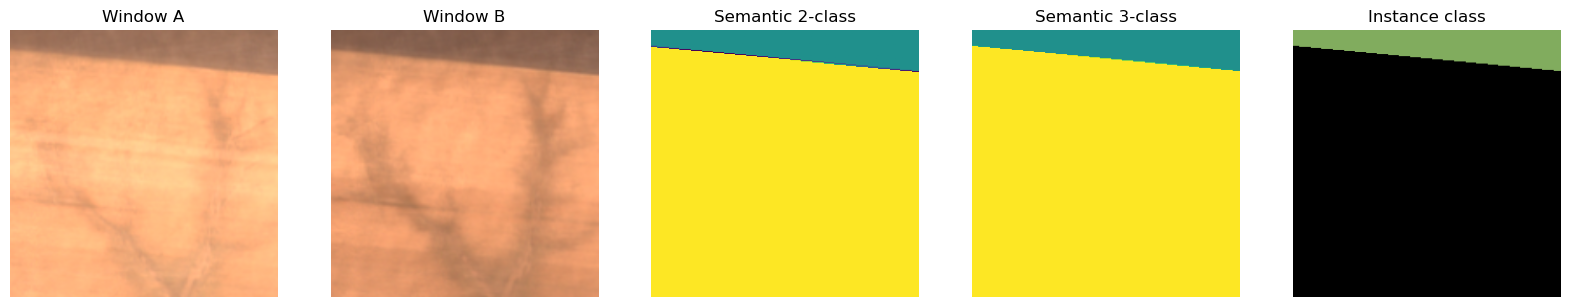

Processing corsica
Processing ../data/ftw/corsica/label_masks/semantic_2class/g7_00028_6.tif, ../data/ftw/corsica/label_masks/semantic_3class/g7_00028_6.tif, ../data/ftw/corsica/label_masks/instance/g7_00028_6.tif, ../data/ftw/corsica/s2_images/window_a/g7_00028_6.tif, ../data/ftw/corsica/s2_images/window_b/g7_00028_6.tif
Window A Shape:  (256, 256, 3)
Window A Dtype:  float64
Window A Value Range:  0.019666666666666666 0.6143333333333333
Window A Mean:  0.14245341491699218
Window A Standard Deviation:  0.0668885953069957
Window A Unique Values:  [0.01966667 0.02033333 0.02133333 ... 0.59233333 0.60166667 0.61433333]
Window A NaN or Invalid Values Present:  False
Window B Shape:  (256, 256, 3)
Window B Dtype:  float64
Window B Value Range:  0.035666666666666666 0.5703333333333334
Window B Mean:  0.146922604031033
Window B Standard Deviation:  0.05698157893436574
Window B Unique Values:  [0.03566667 0.03633333 0.03666667 ... 0.56766667 0.56933333 0.57033333]
Window B NaN or Invalid Valu

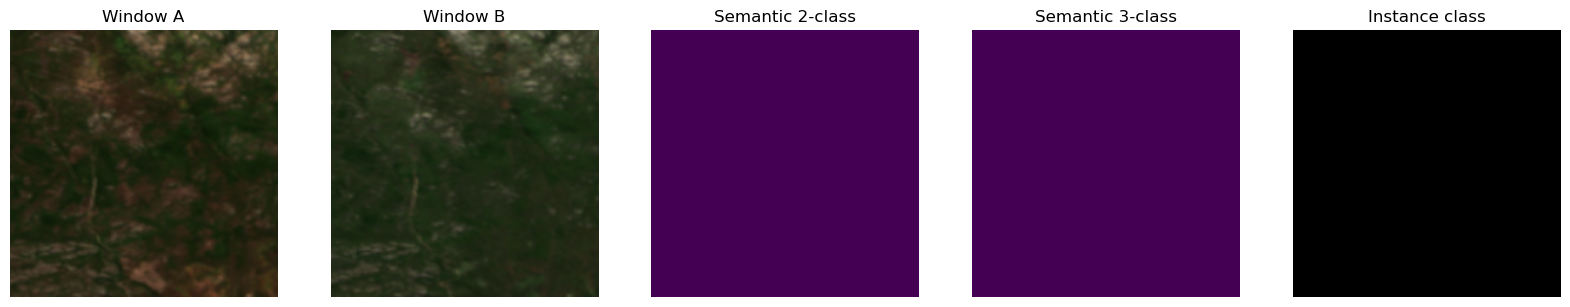

Processing denmark
Processing ../data/ftw/denmark/label_masks/semantic_2class/g6_00067_0.tif, ../data/ftw/denmark/label_masks/semantic_3class/g6_00067_0.tif, ../data/ftw/denmark/label_masks/instance/g6_00067_0.tif, ../data/ftw/denmark/s2_images/window_a/g6_00067_0.tif, ../data/ftw/denmark/s2_images/window_b/g6_00067_0.tif
Window A Shape:  (256, 256, 3)
Window A Dtype:  float64
Window A Value Range:  0.034333333333333334 0.462
Window A Mean:  0.14804615953233508
Window A Standard Deviation:  0.06860456181871537
Window A Unique Values:  [0.03433333 0.03466667 0.035      ... 0.461      0.46133333 0.462     ]
Window A NaN or Invalid Values Present:  False
Window B Shape:  (256, 256, 3)
Window B Dtype:  float64
Window B Value Range:  0.07266666666666667 0.699
Window B Mean:  0.23017474195692278
Window B Standard Deviation:  0.08682429543143592
Window B Unique Values:  [0.07266667 0.073      0.07366667 ... 0.69533333 0.69666667 0.699     ]
Window B NaN or Invalid Values Present:  False
Seman

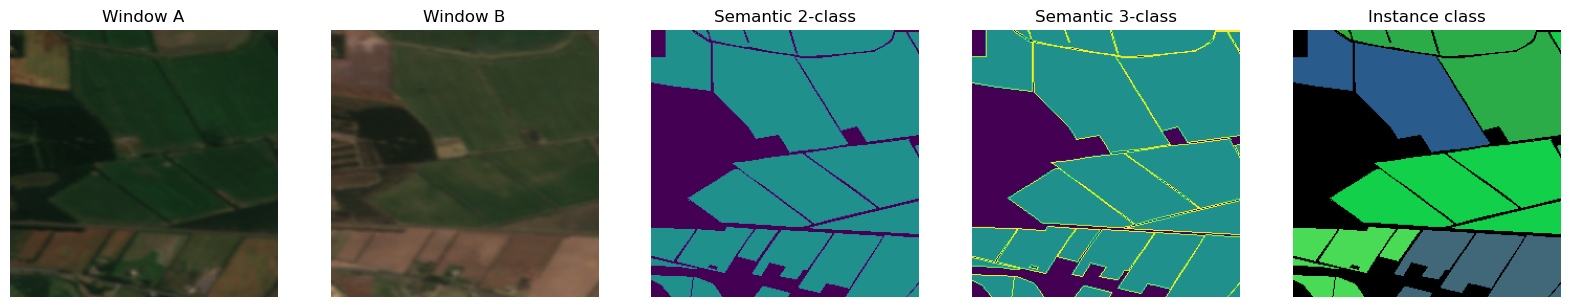

Processing france
Processing ../data/ftw/france/label_masks/semantic_2class/g212_00081_8.tif, ../data/ftw/france/label_masks/semantic_3class/g212_00081_8.tif, ../data/ftw/france/label_masks/instance/g212_00081_8.tif, ../data/ftw/france/s2_images/window_a/g212_00081_8.tif, ../data/ftw/france/s2_images/window_b/g212_00081_8.tif
Window A Shape:  (256, 256, 3)
Window A Dtype:  float64
Window A Value Range:  0.043666666666666666 0.587
Window A Mean:  0.12917139350043408
Window A Standard Deviation:  0.06676690890805163
Window A Unique Values:  [0.04366667 0.04533333 0.046      ... 0.58233333 0.58533333 0.587     ]
Window A NaN or Invalid Values Present:  False
Window B Shape:  (256, 256, 3)
Window B Dtype:  float64
Window B Value Range:  0.06433333333333334 0.5836666666666667
Window B Mean:  0.18498389519585504
Window B Standard Deviation:  0.08158536078942738
Window B Unique Values:  [0.06433333 0.06466667 0.06566667 ... 0.577      0.57866667 0.58366667]
Window B NaN or Invalid Values Pres

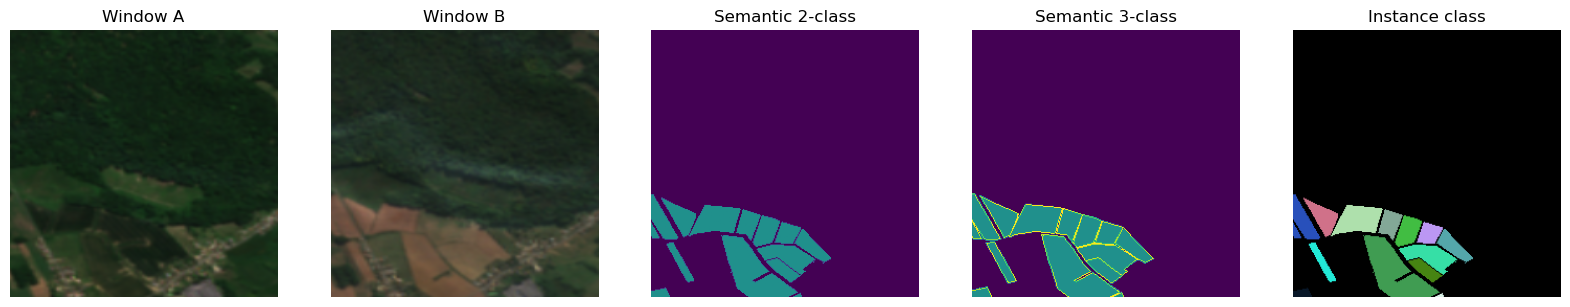

Processing india
Processing ../data/ftw/india/label_masks/semantic_2class/g0_0044.tif, ../data/ftw/india/label_masks/semantic_3class/g0_0044.tif, ../data/ftw/india/label_masks/instance/g0_0044.tif, ../data/ftw/india/s2_images/window_a/g0_0044.tif, ../data/ftw/india/s2_images/window_b/g0_0044.tif
Window A Shape:  (256, 256, 3)
Window A Dtype:  float64
Window A Value Range:  0.119 0.668
Window A Mean:  0.30309911939832895
Window A Standard Deviation:  0.0867473471696859
Window A Unique Values:  [0.119      0.11966667 0.12166667 ... 0.66333333 0.66466667 0.668     ]
Window A NaN or Invalid Values Present:  False
Window B Shape:  (256, 256, 3)
Window B Dtype:  float64
Window B Value Range:  0.25033333333333335 0.845
Window B Mean:  0.44040351528591587
Window B Standard Deviation:  0.09402855677103103
Window B Unique Values:  [0.25033333 0.251      0.25166667 ... 0.843      0.84333333 0.845     ]
Window B NaN or Invalid Values Present:  False
Semantic 2-class Shape:  (1, 256, 256)
Semantic 

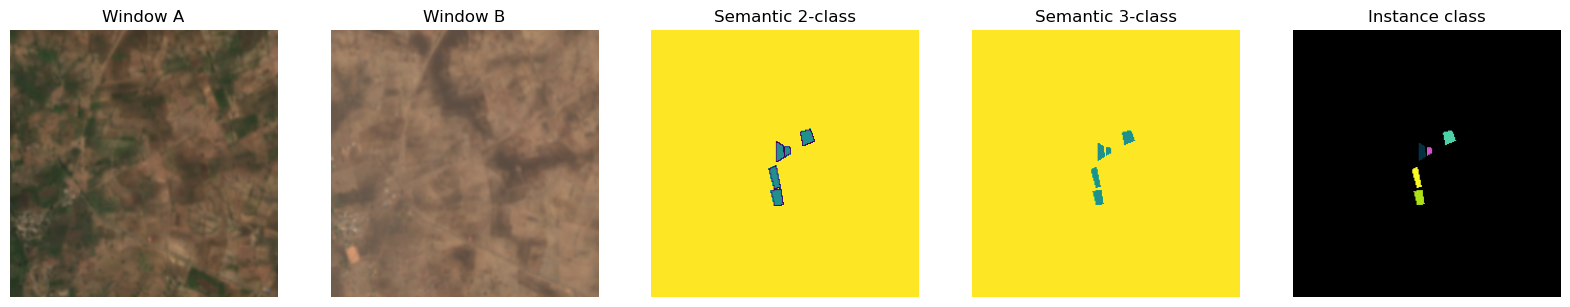

Processing latvia
Processing ../data/ftw/latvia/label_masks/semantic_2class/g50_00005_9.tif, ../data/ftw/latvia/label_masks/semantic_3class/g50_00005_9.tif, ../data/ftw/latvia/label_masks/instance/g50_00005_9.tif, ../data/ftw/latvia/s2_images/window_a/g50_00005_9.tif, ../data/ftw/latvia/s2_images/window_b/g50_00005_9.tif
Window A Shape:  (256, 256, 3)
Window A Dtype:  float64
Window A Value Range:  0.042 0.33066666666666666
Window A Mean:  0.11590754869249136
Window A Standard Deviation:  0.041381632883379406
Window A Unique Values:  [0.042      0.043      0.04333333 0.04466667 0.04533333 0.04566667
 0.046      0.04633333 0.04666667 0.047      0.04733333 0.04766667
 0.048      0.04833333 0.04866667 0.049      0.04933333 0.04966667
 0.05       0.05033333 0.05066667 0.051      0.05133333 0.05166667
 0.052      0.05233333 0.05266667 0.053      0.05333333 0.05366667
 0.054      0.05433333 0.05466667 0.055      0.05533333 0.05566667
 0.056      0.05633333 0.05666667 0.057      0.05733333 0.

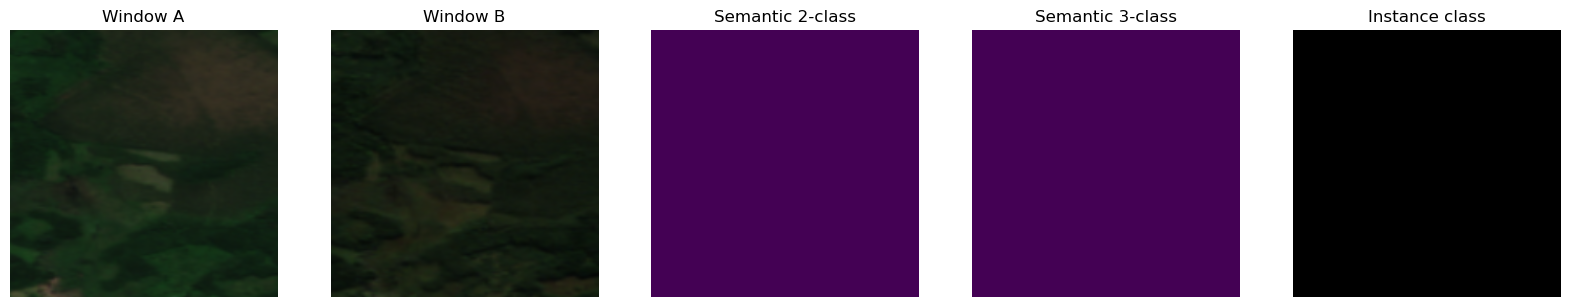

Processing luxembourg
Processing ../data/ftw/luxembourg/label_masks/semantic_2class/g0_00026_2.tif, ../data/ftw/luxembourg/label_masks/semantic_3class/g0_00026_2.tif, ../data/ftw/luxembourg/label_masks/instance/g0_00026_2.tif, ../data/ftw/luxembourg/s2_images/window_a/g0_00026_2.tif, ../data/ftw/luxembourg/s2_images/window_b/g0_00026_2.tif
Window A Shape:  (256, 256, 3)
Window A Dtype:  float64
Window A Value Range:  0.3283333333333333 1.0593333333333332
Window A Mean:  0.4344715287950304
Window A Standard Deviation:  0.0866030342000859
Window A Unique Values:  [0.32833333 0.33       0.33233333 ... 1.056      1.05866667 1.05933333]
Window A NaN or Invalid Values Present:  False
Window B Shape:  (256, 256, 3)
Window B Dtype:  float64
Window B Value Range:  0.372 1.2193333333333334
Window B Mean:  0.48159752061631944
Window B Standard Deviation:  0.10425897221512832
Window B Unique Values:  [0.372      0.37366667 0.37433333 ... 1.215      1.21766667 1.21933333]
Window B NaN or Invalid Va

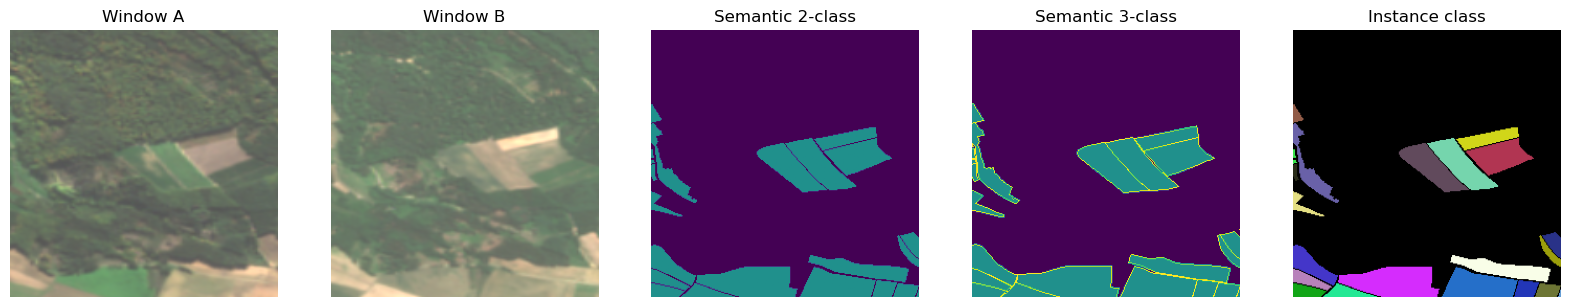

Processing finland
Processing ../data/ftw/finland/label_masks/semantic_2class/g15-1_00130_18.tif, ../data/ftw/finland/label_masks/semantic_3class/g15-1_00130_18.tif, ../data/ftw/finland/label_masks/instance/g15-1_00130_18.tif, ../data/ftw/finland/s2_images/window_a/g15-1_00130_18.tif, ../data/ftw/finland/s2_images/window_b/g15-1_00130_18.tif
Window A Shape:  (256, 256, 3)
Window A Dtype:  float64
Window A Value Range:  0.0013333333333333333 0.6386666666666667
Window A Mean:  0.08555349900987413
Window A Standard Deviation:  0.05758739456263269
Window A Unique Values:  [0.00133333 0.00166667 0.00233333 ... 0.62966667 0.632      0.63866667]
Window A NaN or Invalid Values Present:  False
Window B Shape:  (256, 256, 3)
Window B Dtype:  float64
Window B Value Range:  0.02666666666666667 0.6886666666666666
Window B Mean:  0.10350699022081161
Window B Standard Deviation:  0.05249595948691937
Window B Unique Values:  [0.02666667 0.027      0.02733333 ... 0.669      0.67566667 0.68866667]
Windo

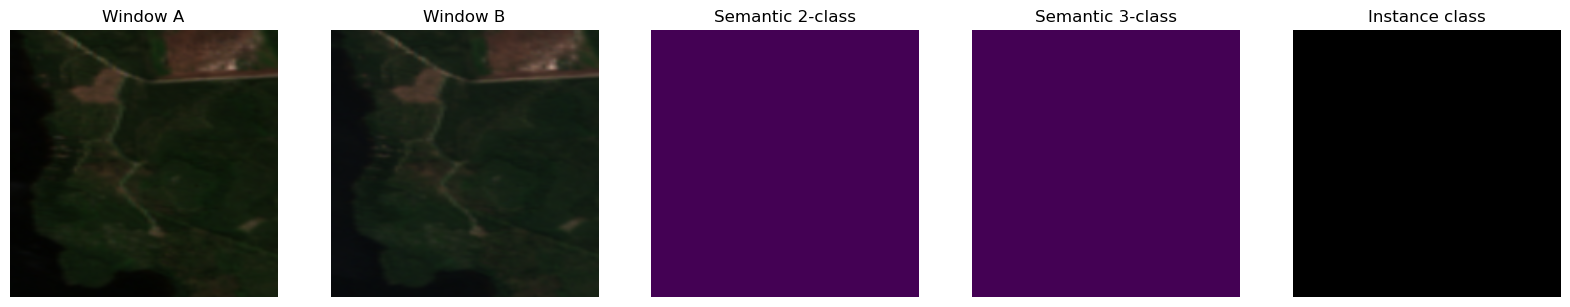

Processing germany
Processing ../data/ftw/germany/label_masks/semantic_2class/g2_00013_16.tif, ../data/ftw/germany/label_masks/semantic_3class/g2_00013_16.tif, ../data/ftw/germany/label_masks/instance/g2_00013_16.tif, ../data/ftw/germany/s2_images/window_a/g2_00013_16.tif, ../data/ftw/germany/s2_images/window_b/g2_00013_16.tif
Window A Shape:  (256, 256, 3)
Window A Dtype:  float64
Window A Value Range:  0.037333333333333336 0.5916666666666667
Window A Mean:  0.27704975212944877
Window A Standard Deviation:  0.15042265862366636
Window A Unique Values:  [0.03733333 0.03933333 0.041      ... 0.58866667 0.59033333 0.59166667]
Window A NaN or Invalid Values Present:  False
Window B Shape:  (256, 256, 3)
Window B Dtype:  float64
Window B Value Range:  0.050666666666666665 0.5966666666666667
Window B Mean:  0.1596421881781684
Window B Standard Deviation:  0.0991228054060465
Window B Unique Values:  [0.05066667 0.051      0.052      ... 0.591      0.59133333 0.59666667]
Window B NaN or Invali

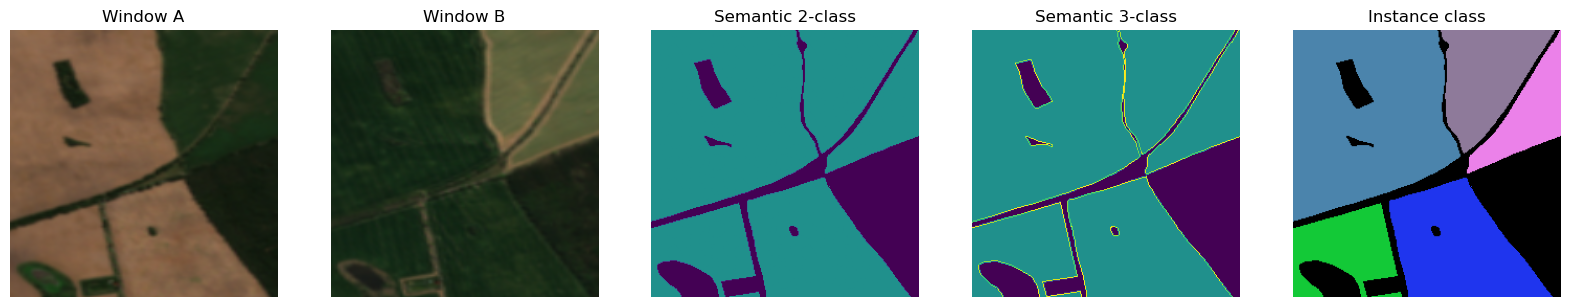

Processing kenya
Processing ../data/ftw/kenya/label_masks/semantic_2class/g0_0000004608-0000010752.tif, ../data/ftw/kenya/label_masks/semantic_3class/g0_0000004608-0000010752.tif, ../data/ftw/kenya/label_masks/instance/g0_0000004608-0000010752.tif, ../data/ftw/kenya/s2_images/window_a/g0_0000004608-0000010752.tif, ../data/ftw/kenya/s2_images/window_b/g0_0000004608-0000010752.tif
Window A Shape:  (256, 256, 3)
Window A Dtype:  float64
Window A Value Range:  0.37166666666666665 1.143
Window A Mean:  0.49782152981228295
Window A Standard Deviation:  0.06587795591349048
Window A Unique Values:  [0.37166667 0.37333333 0.374      ... 1.11733333 1.11966667 1.143     ]
Window A NaN or Invalid Values Present:  False
Window B Shape:  (256, 256, 3)
Window B Dtype:  float64
Window B Value Range:  0.387 1.177
Window B Mean:  0.5317283545600043
Window B Standard Deviation:  0.07320695504230813
Window B Unique Values:  [0.387      0.388      0.391      ... 1.14233333 1.14433333 1.177     ]
Window B N

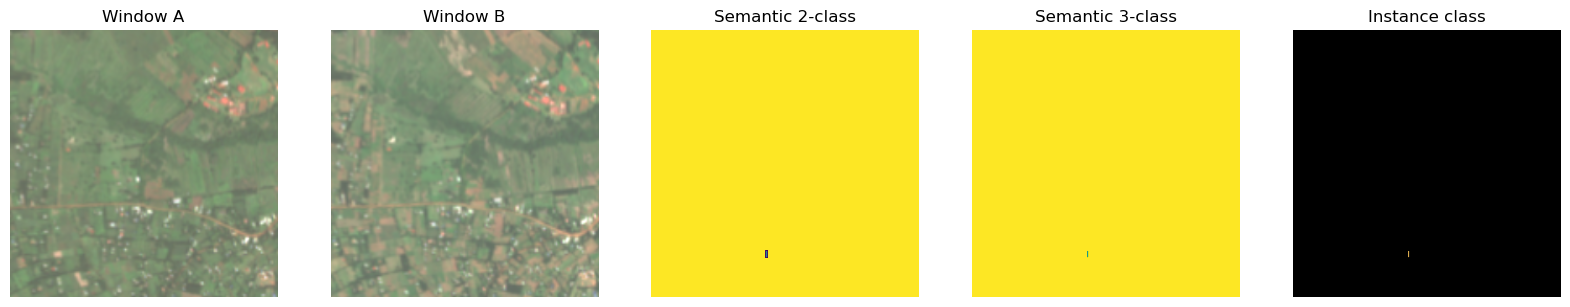

Processing lithuania
Processing ../data/ftw/lithuania/label_masks/semantic_2class/g8_00019_5.tif, ../data/ftw/lithuania/label_masks/semantic_3class/g8_00019_5.tif, ../data/ftw/lithuania/label_masks/instance/g8_00019_5.tif, ../data/ftw/lithuania/s2_images/window_a/g8_00019_5.tif, ../data/ftw/lithuania/s2_images/window_b/g8_00019_5.tif
Window A Shape:  (256, 256, 3)
Window A Dtype:  float64
Window A Value Range:  0.06133333333333333 0.8373333333333334
Window A Mean:  0.23696899074978303
Window A Standard Deviation:  0.11078603391667563
Window A Unique Values:  [0.06133333 0.06166667 0.06233333 ... 0.81966667 0.83266667 0.83733333]
Window A NaN or Invalid Values Present:  False
Window B Shape:  (256, 256, 3)
Window B Dtype:  float64
Window B Value Range:  0.011666666666666667 0.43066666666666664
Window B Mean:  0.13855412122938368
Window B Standard Deviation:  0.080427890867115
Window B Unique Values:  [0.01166667 0.01233333 0.01266667 ... 0.42833333 0.43       0.43066667]
Window B NaN or

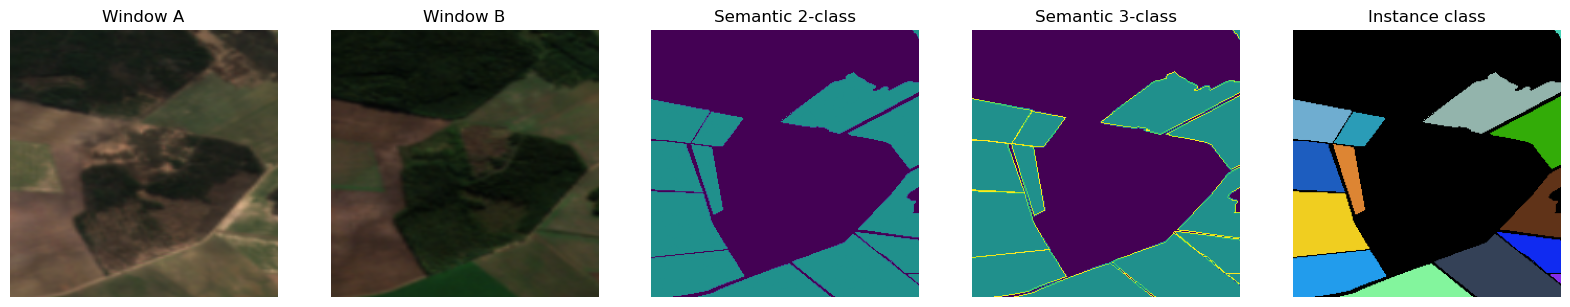

Processing netherlands
Processing ../data/ftw/netherlands/label_masks/semantic_2class/g16_00100_2.tif, ../data/ftw/netherlands/label_masks/semantic_3class/g16_00100_2.tif, ../data/ftw/netherlands/label_masks/instance/g16_00100_2.tif, ../data/ftw/netherlands/s2_images/window_a/g16_00100_2.tif, ../data/ftw/netherlands/s2_images/window_b/g16_00100_2.tif
Window A Shape:  (256, 256, 3)
Window A Dtype:  float64
Window A Value Range:  0.44333333333333336 1.2896666666666667
Window A Mean:  0.5965457390679254
Window A Standard Deviation:  0.062147144751933704
Window A Unique Values:  [0.44333333 0.447      0.44833333 ... 1.27066667 1.28566667 1.28966667]
Window A NaN or Invalid Values Present:  False
Window B Shape:  (256, 256, 3)
Window B Dtype:  float64
Window B Value Range:  0.3626666666666667 4.425666666666666
Window B Mean:  0.6121962941487632
Window B Standard Deviation:  0.11528304749999606
Window B Unique Values:  [0.36266667 0.36566667 0.39666667 ... 4.29666667 4.40033333 4.42566667]
W

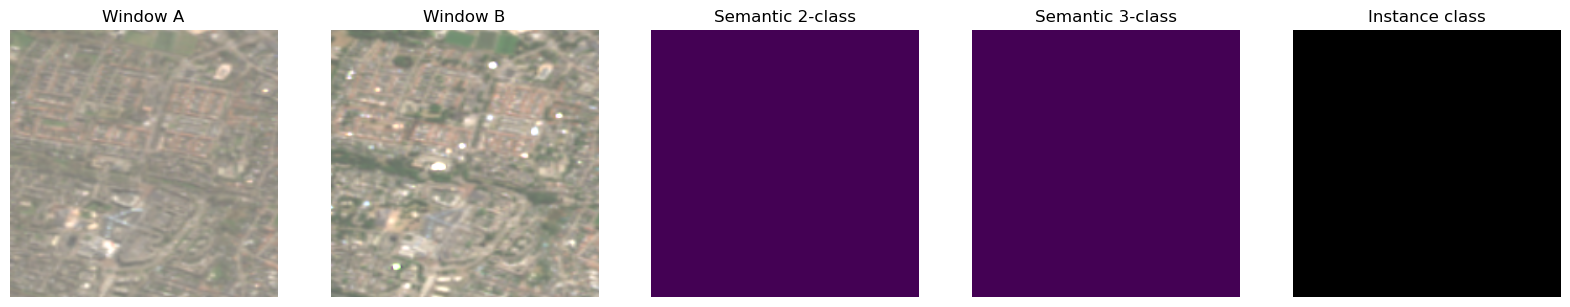

Processing rwanda
Processing ../data/ftw/rwanda/label_masks/semantic_2class/1592871.tif, ../data/ftw/rwanda/label_masks/semantic_3class/1592871.tif, ../data/ftw/rwanda/label_masks/instance/1592871.tif, ../data/ftw/rwanda/s2_images/window_a/1592871.tif, ../data/ftw/rwanda/s2_images/window_b/1592871.tif
Window A Shape:  (256, 256, 3)
Window A Dtype:  float64
Window A Value Range:  0.06566666666666666 0.909
Window A Mean:  0.2238504876030816
Window A Standard Deviation:  0.06926802685980257
Window A Unique Values:  [0.06566667 0.06633333 0.06866667 ... 0.86033333 0.88666667 0.909     ]
Window A NaN or Invalid Values Present:  False
Window B Shape:  (256, 256, 3)
Window B Dtype:  float64
Window B Value Range:  0.09366666666666666 1.8076666666666668
Window B Mean:  0.32707906934950093
Window B Standard Deviation:  0.12128372924214513
Window B Unique Values:  [0.09366667 0.09566667 0.096      ... 1.754      1.76266667 1.80766667]
Window B NaN or Invalid Values Present:  False
Semantic 2-clas

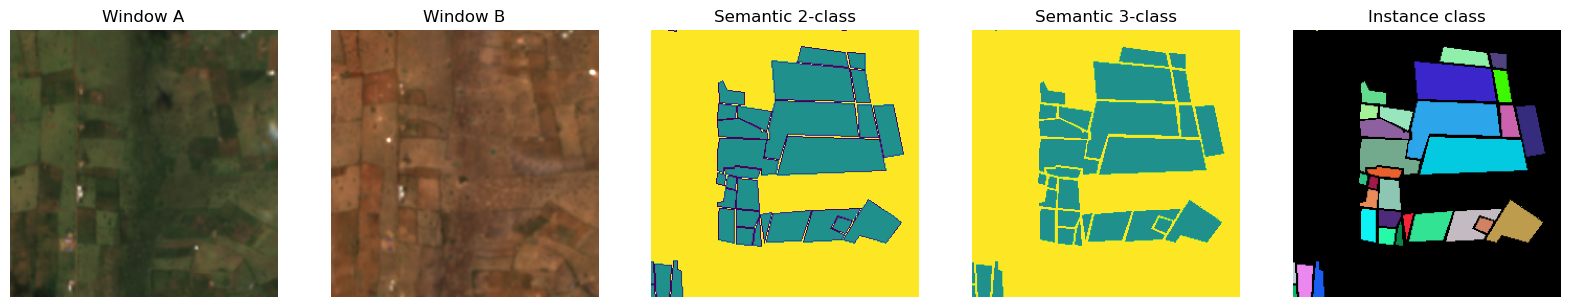

Processing slovenia
Processing ../data/ftw/slovenia/label_masks/semantic_2class/g6_00067_0.tif, ../data/ftw/slovenia/label_masks/semantic_3class/g6_00067_0.tif, ../data/ftw/slovenia/label_masks/instance/g6_00067_0.tif, ../data/ftw/slovenia/s2_images/window_a/g6_00067_0.tif, ../data/ftw/slovenia/s2_images/window_b/g6_00067_0.tif
Window A Shape:  (256, 256, 3)
Window A Dtype:  float64
Window A Value Range:  0.044 0.3476666666666667
Window A Mean:  0.09816426934136284
Window A Standard Deviation:  0.03550987275775978
Window A Unique Values:  [0.044      0.04633333 0.047      0.04733333 0.04766667 0.048
 0.04833333 0.04866667 0.049      0.04933333 0.04966667 0.05
 0.05033333 0.05066667 0.051      0.05133333 0.05166667 0.052
 0.05233333 0.05266667 0.053      0.05333333 0.05366667 0.054
 0.05433333 0.05466667 0.055      0.05533333 0.05566667 0.056
 0.05633333 0.05666667 0.057      0.05733333 0.05766667 0.058
 0.05833333 0.05866667 0.059      0.05933333 0.05966667 0.06
 0.06033333 0.06066667 

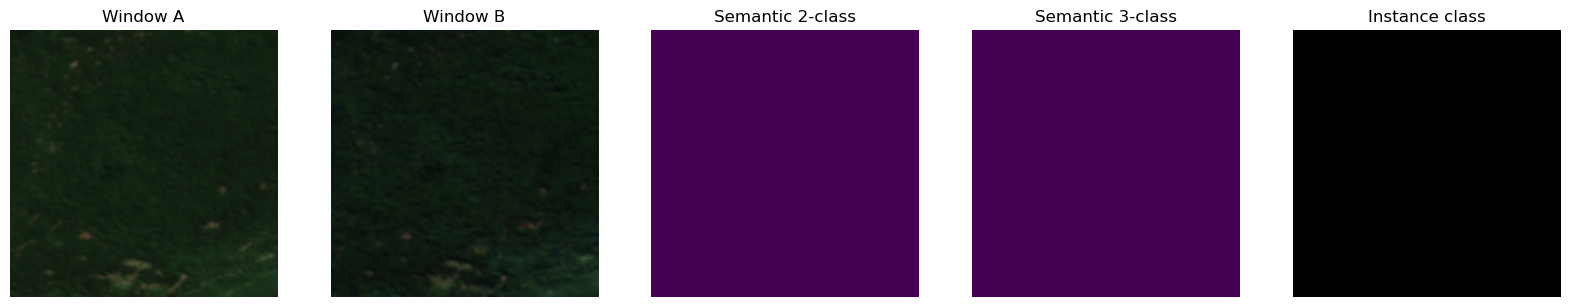

Processing spain
Processing ../data/ftw/spain/label_masks/semantic_2class/g7_00028_6.tif, ../data/ftw/spain/label_masks/semantic_3class/g7_00028_6.tif, ../data/ftw/spain/label_masks/instance/g7_00028_6.tif, ../data/ftw/spain/s2_images/window_a/g7_00028_6.tif, ../data/ftw/spain/s2_images/window_b/g7_00028_6.tif
Window A Shape:  (256, 256, 3)
Window A Dtype:  float64
Window A Value Range:  0.058333333333333334 1.9633333333333334
Window A Mean:  0.5036477016872829
Window A Standard Deviation:  0.21790301639433554
Window A Unique Values:  [0.05833333 0.05866667 0.059      ... 1.94233333 1.962      1.96333333]
Window A NaN or Invalid Values Present:  False
Window B Shape:  (256, 256, 3)
Window B Dtype:  float64
Window B Value Range:  0.055 2.0513333333333335
Window B Mean:  0.2823889906141493
Window B Standard Deviation:  0.14948043826557356
Window B Unique Values:  [0.055      0.05566667 0.056      ... 2.00533333 2.03933333 2.05133333]
Window B NaN or Invalid Values Present:  False
Semanti

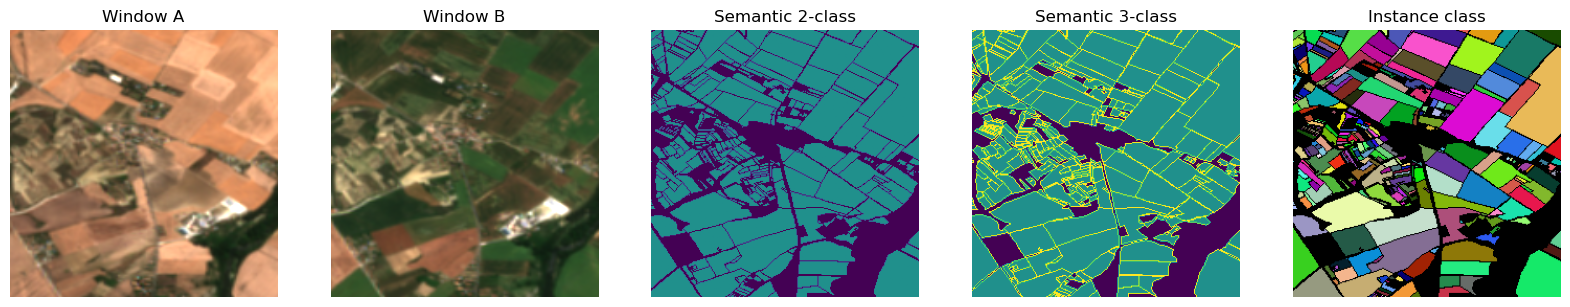

Processing vietnam
Processing ../data/ftw/vietnam/label_masks/semantic_2class/g44_0000001024-0000000000.tif, ../data/ftw/vietnam/label_masks/semantic_3class/g44_0000001024-0000000000.tif, ../data/ftw/vietnam/label_masks/instance/g44_0000001024-0000000000.tif, ../data/ftw/vietnam/s2_images/window_a/g44_0000001024-0000000000.tif, ../data/ftw/vietnam/s2_images/window_b/g44_0000001024-0000000000.tif
Window A Shape:  (256, 256, 3)
Window A Dtype:  float64
Window A Value Range:  0.058666666666666666 0.9693333333333334
Window A Mean:  0.3118453233506944
Window A Standard Deviation:  0.17134177292072356
Window A Unique Values:  [0.05866667 0.05966667 0.06033333 ... 0.95066667 0.95333333 0.96933333]
Window A NaN or Invalid Values Present:  False
Window B Shape:  (256, 256, 3)
Window B Dtype:  float64
Window B Value Range:  0.057666666666666665 1.319
Window B Mean:  0.29771580844455287
Window B Standard Deviation:  0.14646396121237945
Window B Unique Values:  [0.05766667 0.05833333 0.05866667 ..

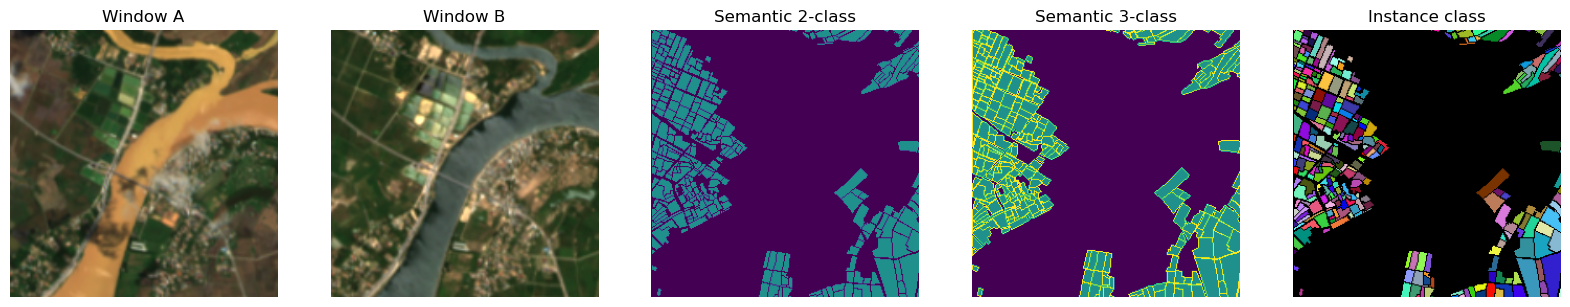

In [4]:
for country in countries:
    print(f"Processing {country}")
    window_a_folder = Path.Path(root_folder) / country / "s2_images" / "window_a"
    window_b_folder = Path.Path(root_folder) / country / "s2_images" / "window_b"
    label_masks_2_class = Path.Path(root_folder) / country / "label_masks" / "semantic_2class"
    label_masks_3_class = Path.Path(root_folder) / country / "label_masks" / "semantic_3class"
    label_masks_instance = Path.Path(root_folder) / country / "label_masks" / "instance"

    semantic_2_class_files = list(label_masks_2_class.glob("*.tif"))
    semantic_2_class_files = semantic_2_class_files[:samples_to_show]
    
    semantic_3_class_files = []
    instance_files = []
    window_a_files = []
    window_b_files = []
    
    for semantic_2_class_file in semantic_2_class_files:
        semantic_3_class_files.append(label_masks_3_class / semantic_2_class_file.name)
        instance_files.append(label_masks_instance / semantic_2_class_file.name)
        window_a_files.append(window_a_folder / semantic_2_class_file.name)
        window_b_files.append(window_b_folder / semantic_2_class_file.name)

    for semantic_2_class_file, semantic_3_class_file, instance_file, window_a_file, window_b_file in zip(semantic_2_class_files, semantic_3_class_files, instance_files, window_a_files, window_b_files):
        print(f"Processing {semantic_2_class_file}, {semantic_3_class_file}, {instance_file}, {window_a_file}, {window_b_file}")
        plot_data(window_a_file, window_b_file, semantic_2_class_file, semantic_3_class_file, instance_file)

